In [1]:
import sys
import tensorflow as tf
tf.enable_eager_execution() 
import utils.dataset_gen as dsg
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

/usr/local/anaconda3/envs/da/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/envs/da/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/envs/da/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/envs/da/lib/python3.6/site-packages/tensorf

In [2]:
ds = dsg.office31_datasets('A','D') #, lambda x: tf.compat.v2.keras.applications.vgg16.preprocess_input(x, mode='tf'))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Visualise some samples

In [3]:
def show_batch(image_batch, label_batch, batch_size=15):
    plt.figure(figsize=(10,10))
    CLASS_NAMES = np.array(dsg.office31_class_names())
    for n in range(batch_size):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

In [7]:
si = iter(dsg.prep_train(ds['source']['train']['ds']))

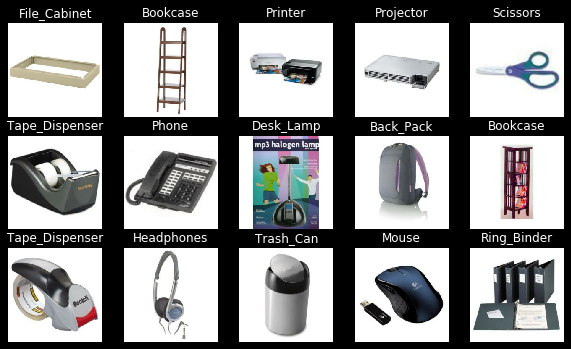

In [8]:
image_batch, label_batch = next(si)
show_batch(image_batch.numpy(), label_batch.numpy())

In [9]:
ti = iter(dsg.prep_train(ds['target']['train']['ds']))

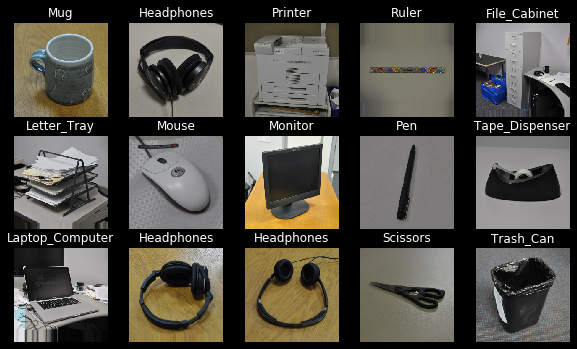

In [10]:
image_batch, label_batch = next(ti)
show_batch(image_batch.numpy(), label_batch.numpy())

## Check that combi dataset works

In [89]:
ds_combo, _ = dsg.da_combi_dataset(ds['source']['train']['ds'], ds['target']['train']['ds'], ratio=1, shuffle_buffer_size=5000)

In [92]:
dsi_combo = iter(dsg.prep_train(ds_combo, batch_size=4))

In [93]:
s_dat, s_lbl, t_dat, t_lbl, eq = next(dsi_combo)
eq.numpy()

array([False, False,  True,  True])

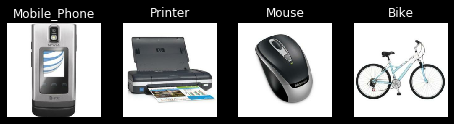

In [94]:
show_batch(s_dat.numpy(), s_lbl.numpy(), 4)

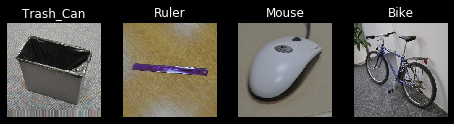

In [95]:
show_batch(t_dat.numpy(), t_lbl.numpy(), 4)

## Check picture values and preprocessing effect

In [96]:
# pic = tf.compat.v2.keras.preprocessing.image.load_img('datasets/Office31/amazon/images/back_pack/frame_0001.jpg', target_size=(224, 224))
# pic = tf.compat.v2.keras.preprocessing.image.img_to_array(pic)
pic = t_dat[0]*255

tf.compat.v2.keras.applications.vgg16.preprocess_input(pic, mode='tf')
pic = pic.numpy()
pic.min(), pic.mean(), pic.max()

(3.0602648, 114.154274, 254.45503)

## Check augmentation

In [5]:
ai = iter(dsg.augment(dsg.prep_train(ds['source']['train']['ds'])))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

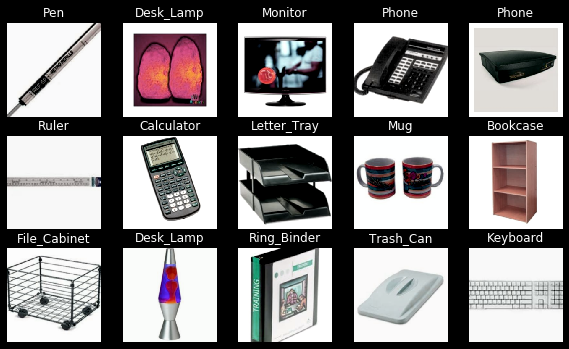

In [6]:
image_batch, label_batch = next(ai)
show_batch(image_batch.numpy(), label_batch.numpy())

In [43]:
ds_combo, _ = dsg.da_combi_dataset(ds['source']['train']['ds'], ds['target']['train']['ds'], ratio=1, shuffle_buffer_size=5000)
ds_combo = dsg.prep_train(ds_combo, batch_size=4)
aic = iter(dsg.augment_combi(ds_combo, batch_size=4))

In [44]:
s_dat, s_lbl, t_dat, t_lbl, eq = next(aic)
eq.numpy()

array([False,  True,  True, False])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


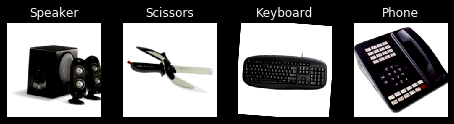

In [45]:
show_batch(s_dat.numpy(), s_lbl.numpy(), 4)

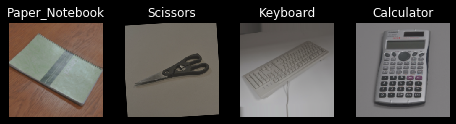

In [46]:
show_batch(t_dat.numpy(), t_lbl.numpy(), 4)